In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import random

np.random.seed(29)  # For numpy numbers
random.seed(29)   # For Python

In [2]:
def extract_file_paths(path):
    global image_filenames
    image_filenames = []
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            for file in files:
                if(file[-3:] == "png" or file[-3:] == "PNG"):
                    image_filenames.append(str(root)+os.sep+str(file))
    print(len(image_filenames))


In [3]:
extract_file_paths("C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train")

species = []
for image in image_filenames:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species.append(base)

species_count = [[x,species.count(x)] for x in set(species)]
species_df = pd.DataFrame(species_count, columns=["Species", "Count"])
print(species_df)
species_df.to_csv("Augmentation.csv")

43255
                      Species  Count
0            Common Chickweed   4155
1                    Charlock   3978
2            Loose Silky-bent   4448
3             Shepherds Purse   3142
4                       Maize   3006
5                  Sugar beet   3927
6                Common wheat   3006
7                 Black-grass   3577
8                     Fat Hen   3230
9   Small-flowered Cranesbill   3373
10          Scentless Mayweed   3509
11                   Cleavers   3904


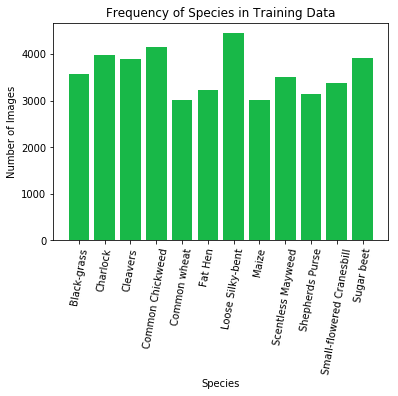

In [15]:
plt.bar(species_df.Species, species_df.Count, color = '#18B848')
plt.title("Frequency of Species in Training Data")
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.xticks(rotation = 80)
plt.show()

In [ ]:
image = cv2.imread("C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train/Maize/1d21b25f9.png")
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
species_list = []
height = []
width = []

for image in image_filenames:
    img = cv2.imread(image)
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species_list.append(base)
    height.append(img.shape[0])
    width.append(img.shape[1])


In [17]:
image_dim = {"Species": species_list, "Height": height, "Width": width}
image_dim_df = pd.DataFrame(image_dim, columns = ["Species", "Height", "Width"])


In [18]:
image_dim_df.groupby('Species').quantile([0, 0.25, 0.5, 0.75, 1])

Height    Width
Species                                         
Black-grass               0.00    73.00    73.00
                          0.25   292.00   292.00
                          0.50   586.00   586.00
                          0.75   906.00   906.00
                          1.00  2840.00  2840.00
Charlock                  0.00   121.00   121.00
                          0.25   188.00   188.00
                          0.50   375.00   375.00
                          0.75   515.00   515.00
                          1.00  1582.00  1582.00
Cleavers                  0.00    66.00    66.00
                          0.25   169.00   169.00
                          0.50   298.00   298.00
                          0.75   422.00   422.00
                          1.00   866.00   866.00
Common Chickweed          0.00    54.00    54.00
                          0.25   107.00   107.00
                          0.50   155.00   155.00
                          0.75   374.50   374.50
                          1.00   718.00   718.00
Common wheat              0.00    51.00    51.00
                          0.25   136.00   136.00
                          0.50   456.00   456.00
                          0.75   651.00   651.00
                          1.00  1432.00  1432.00
Fat Hen                   0.00    55.00    55.00
                          0.25   161.00   161.00
                          0.50   234.00   234.00
                          0.75   369.00   369.00
                          1.00  1273.00  1273.00
Loose Silky-bent          0.00    71.00    71.00
                          0.25   136.00   136.00
                          0.50   197.00   197.00
                          0.75   541.00   541.00
                          1.00  3991.00  3991.00
Maize                     0.00    54.00    54.00
                          0.25   114.00   114.00
                          0.50   415.00   415.00
                          0.75   721.75   721.75
                          1.00  1900.00  1900.00
Scentless Mayweed         0.00    49.00    49.00
                          0.25    87.00    87.00
                          0.50   123.00   123.00
                          0.75   363.00   363.00
                          1.00  1227.00  1227.00
Shepherds Purse           0.00    63.00    63.00
                          0.25   117.00   117.00
                          0.50   169.00   169.00
                          0.75   401.00   401.00
                          1.00  1317.00  1317.00
Small-flowered Cranesbill 0.00    62.00    62.00
                          0.25   174.00   174.00
                          0.50   287.00   287.00
                          0.75   460.00   460.00
                          1.00  1006.00  1006.00
Sugar beet                0.00    49.00    49.00
                          0.25   383.00   383.00
                          0.50   553.00   553.00
                          0.75   749.00   749.00
                          1.00  1715.00  1715.00

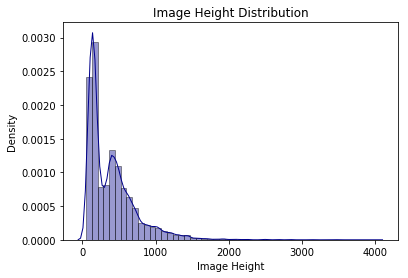

In [19]:
sns.distplot(height, hist=True, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.title('Image Height Distribution')
plt.xlabel('Image Height')
plt.ylabel('Density')
plt.show()

In [6]:
### Creating Validation Folders and Dataset ###

validpath = r'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/validation' 
if not os.path.exists(validpath):
    os.makedirs(validpath)
for i in set(species):
    path = 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/validation/{}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path) 
for i in set(species):
    path = 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/test/{}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path) 

In [8]:
path = 'C:/Users/sjcrum/Documents/Data_Science_Capstone/PlantImages/train'
roots = []
for root, dirs, files in os.walk(path):
    roots.append(root)
    
print(len(roots[1:]))

# for root in roots[1:]:  
#     images = []
#     for root, dirs, files in os.walk(root):
#         for file in files:
#             images.append(str(root)+os.sep+str(file))
#     random.shuffle(images)
#     valid_images = images[:int(0.15 * len(images))]
#     print(len(valid_images))
#     for image in valid_images:
#         split_im = image.split("train",1)
#         os.rename(image, split_im[0]+'validation'+split_im[1])

# for root in roots[1:]:  
#     images = []
#     for root, dirs, files in os.walk(root):
#         for file in files:
#             images.append(str(root)+os.sep+str(file))
#     random.shuffle(images)
#     test_images = images[:int(0.25 * len(images))]
#     print(len(test_images))
#     for image in test_images:
#         split_im = image.split("train",1)
#         os.rename(image, split_im[0]+'test'+split_im[1])

print(set(species))

12
894
994
976
1038
751
807
1112
751
877
785
843
981
{'Common Chickweed', 'Charlock', 'Loose Silky-bent', 'Shepherds Purse', 'Maize', 'Sugar beet', 'Common wheat', 'Black-grass', 'Fat Hen', 'Small-flowered Cranesbill', 'Scentless Mayweed', 'Cleavers'}
